In [ ]:
!gdown --id 1uGGu0l4mg3iZl60La4ecn8RzadSNkbnT

Downloading...
From: https://drive.google.com/uc?id=1uGGu0l4mg3iZl60La4ecn8RzadSNkbnT
To: /content/VizWiz.zip
100% 66.9M/66.9M [00:00<00:00, 81.9MB/s]


In [ ]:
from zipfile import ZipFile
file_name = '/content/VizWiz.zip'

with ZipFile(file_name, 'r',) as zip:
  zip.extractall()
  print('Done!!')

Done!!


In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

In [ ]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.probability import FreqDist

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Lập chỉ mục dataset

In [ ]:
txt_path = os.listdir('/content/txt')
txt = []

for filename in txt_path:
  tempt = open(os.path.join('/content/txt/' + filename), 'r', encoding='utf-8', errors='ignore').read()
  t = tempt.replace("\n", " ")
  txt.append( [ t, os.path.join('/content/img/', filename[:-3]) + 'png' ] )

txt = np.array(txt)

In [ ]:
txt

array([['Four questions about the southern reconstruction in the United States a page from a book with a lot of political writing A list of questions about the Reconstruction period of the South. Four questions are shown starting from #14 and ending at #17. Questions from a government class test appear on a paper.',
        '/content/img/31123.png'],
       ['A computer screen displays a message box over a background that says it is installing Windows. A computer screen shows an installation window with the cursor in the middle. Part of a computer screen with a window open to install a driver. Computer monitor with a driver install screen up. application is installed in Laptop or desktop computer in that screen shown (the driver to be installed)',
        '/content/img/23663.png'],
       ['For someone who wants to explore jazz, this CD has a collection of music by different artists. JAZZ collection that has been sealed as music packaging. a CD case of JAZZ collection of Grand Reunion 

# Tiền xử lý văn bản

In [ ]:
# this function returns a list of tokenized and stemmed words of any text
def get_tokenized_list(doc_text):
    tokens = nltk.word_tokenize(doc_text)
    return tokens

# This function will performing stemming on tokenized words
def word_stemmer(token_list):
  ps = nltk.stem.PorterStemmer()
  stemmed = []
  for words in token_list:
    stemmed.append(ps.stem(words))
  return stemmed

In [ ]:
# Function to remove stopwords from tokenized word list
stop_words = set(stopwords.words('english'))

def remove_stopwords(doc_text):
  cleaned_text = []
  for words in doc_text:
    if words not in stop_words:
      cleaned_text.append(words)
  return cleaned_text

In [ ]:
cleaned_corpus = []
token_list = []

for doc in txt[:, 0]:
  tokens = get_tokenized_list(doc)
  token_list.append(tokens)

  doc_text = remove_stopwords(tokens)
  doc_text  = word_stemmer(doc_text)
  doc_text = ' '.join(doc_text)
  cleaned_corpus.append(doc_text)

In [ ]:
empty = []

empty.append(cleaned_corpus)

empty.append(txt[:, 1])

empty = np.array(empty)

empty.flatten()

array(['four question southern reconstruct unit state page book lot polit write A list question reconstruct period south . four question shown start # 14 end # 17 . question govern class test appear paper .',
       'A comput screen display messag box background say instal window . A comput screen show instal window cursor middl . part comput screen window open instal driver . comput monitor driver instal screen . applic instal laptop desktop comput screen shown ( driver instal )',
       'for someon want explor jazz , CD collect music differ artist . jazz collect seal music packag . CD case jazz collect grand reunion etc An unopen black white jazz CD red letter . A music case jazz collect descript say grand reunion earl hine trio record live villag vanguard roy eldridg coleman hawkin .',
       ..., '/content/img/26995.png', '/content/img/28065.png',
       '/content/img/29601.png'], dtype='<U1073')

In [ ]:
empty[0,:]

array(['four question southern reconstruct unit state page book lot polit write A list question reconstruct period south . four question shown start # 14 end # 17 . question govern class test appear paper .',
       'A comput screen display messag box background say instal window . A comput screen show instal window cursor middl . part comput screen window open instal driver . comput monitor driver instal screen . applic instal laptop desktop comput screen shown ( driver instal )',
       'for someon want explor jazz , CD collect music differ artist . jazz collect seal music packag . CD case jazz collect grand reunion etc An unopen black white jazz CD red letter . A music case jazz collect descript say grand reunion earl hine trio record live villag vanguard roy eldridg coleman hawkin .',
       ..., 'A flower arrang shown comput display',
       'A 1 ounc orang bag tortilla chip vinni A close part bag tortilla chip . qualiti issu sever recogn visual content . qualiti issu sever recogn

# Thống kê

In [ ]:
arr = []
for i in token_list:
  arr += i

In [ ]:
freq_ = FreqDist(arr)

freq_

FreqDist({'Four': 23,
          'questions': 73,
          'about': 301,
          'the': 7351,
          'southern': 1,
          'reconstruction': 2,
          'in': 3370,
          'United': 35,
          'States': 30,
          'a': 22033,
          'page': 437,
          'from': 704,
          'book': 526,
          'with': 7815,
          'lot': 55,
          'of': 16023,
          'political': 3,
          'writing': 273,
          'A': 11667,
          'list': 63,
          'Reconstruction': 1,
          'period': 2,
          'South': 2,
          '.': 16446,
          'are': 1997,
          'shown': 404,
          'starting': 14,
          '#': 5,
          '14': 10,
          'and': 6417,
          'ending': 5,
          'at': 359,
          '17': 4,
          'Questions': 1,
          'government': 3,
          'class': 9,
          'test': 68,
          'appear': 10,
          'on': 9999,
          'paper': 826,
          'computer': 2550,
          'screen': 2682,
       

# Chuyển đổi nó thành vector TF-IDF

In [ ]:
vectorizerX = TfidfVectorizer()
vectorizerX.fit(empty[0,:])
doc_vector = vectorizerX.transform(empty[0,:])
print(vectorizerX.get_feature_names_out())

['00' '000' '00011420' ... 'zoomtext' 'zucca' 'zylo']


In [ ]:
def txt_img_query(query_txt, num):
  query = query_txt
  query = get_tokenized_list(query)
  query = remove_stopwords(query)
  q = []
  for w in word_stemmer(query):
    q.append(w)
  q = ' '.join(q)
  query_vector = vectorizerX.transform([q])

  # Cosine Similarity
  cosineSimilarities = cosine_similarity(doc_vector,query_vector).flatten()

  sort_arr = np.array(cosineSimilarities)

  # Top most relevant
  related_docs_indices = cosineSimilarities.argsort()[:(-num-1):-1]

  res = []
  for i in related_docs_indices:
      data = [empty[:, i]]
      res.append(data)

  res = np.array(res)

  # Print query
  for path in res[:,0,1]:
    res_path = os.path.join(path)

    try:
      img = plt.imread(res_path)

      plt.figure(figsize=(6,6))
      plt.imshow(img)
      plt.show()
    except:
      print('Image Missing')

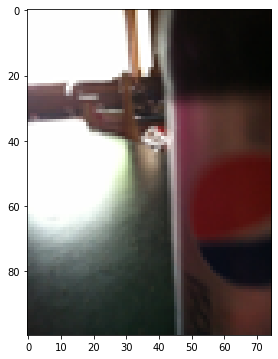

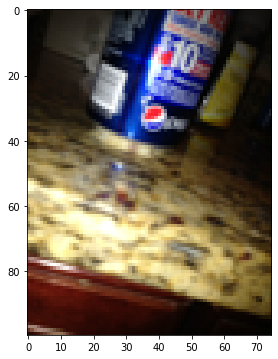

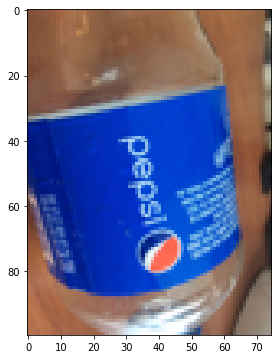

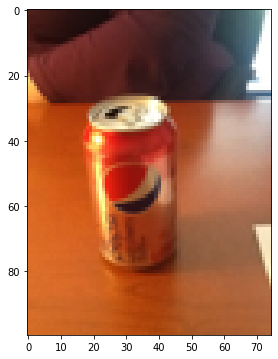

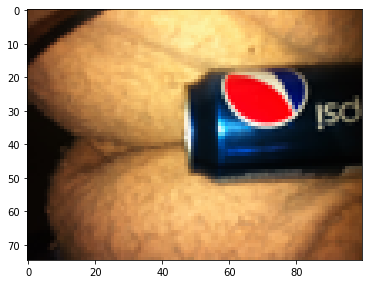

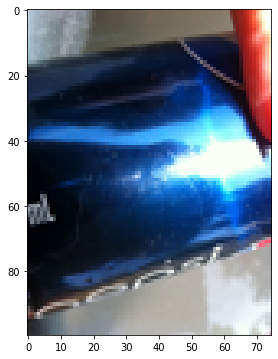

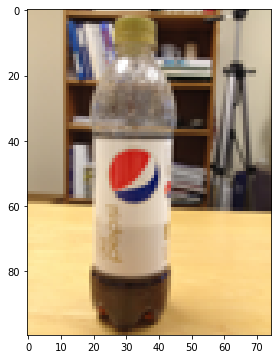

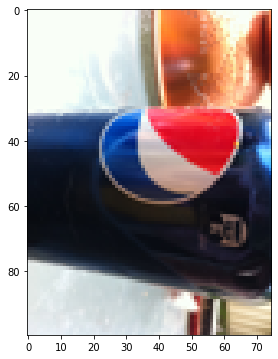

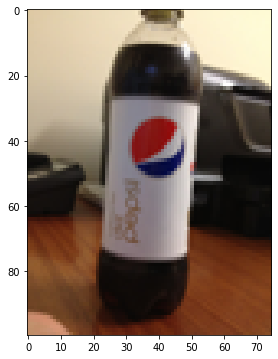

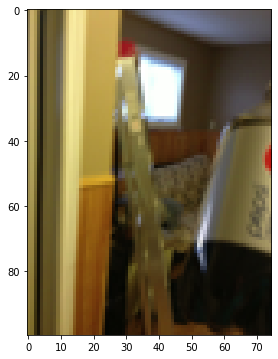

In [ ]:
txt_img_query('A PEPSI bottle   on tHe TABle', 10)
# 8/10

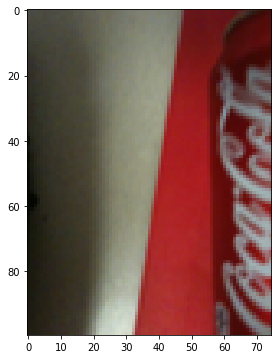

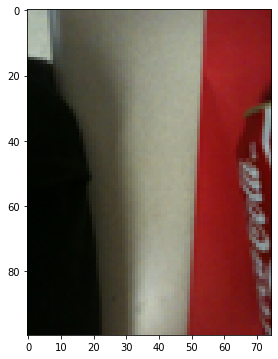

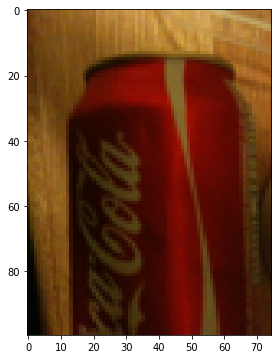

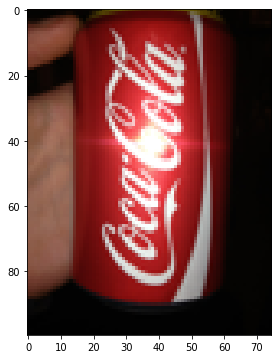

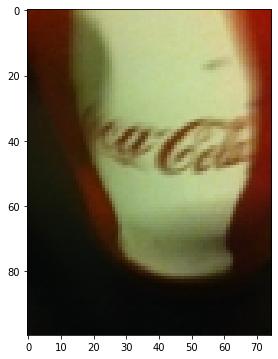

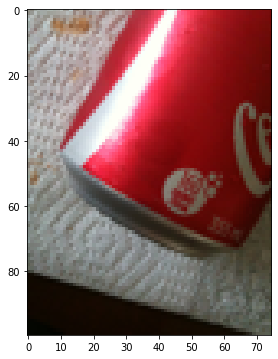

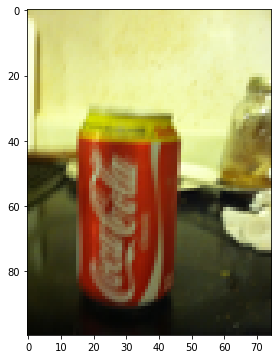

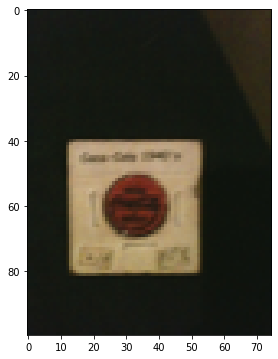

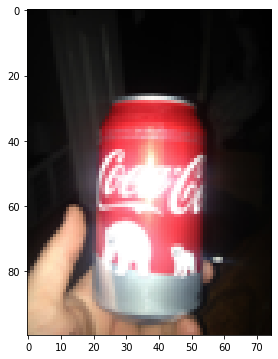

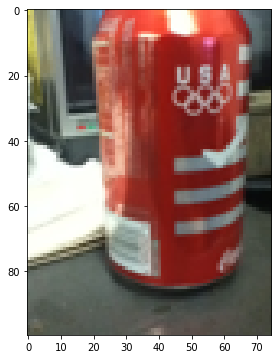

In [ ]:
txt_img_query('a can of coca on the table', 10)
# 6/10

Image Missing


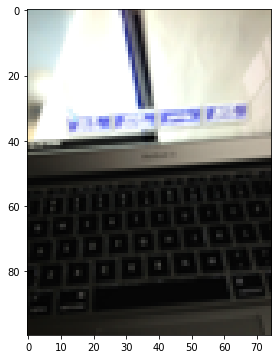

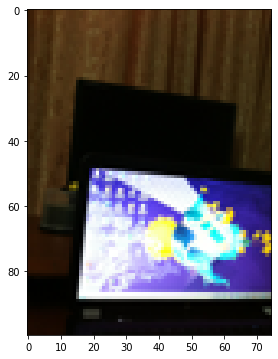

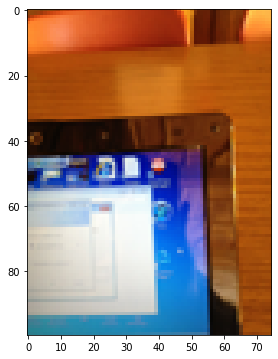

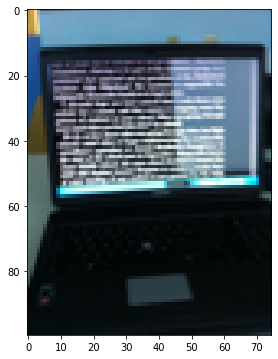

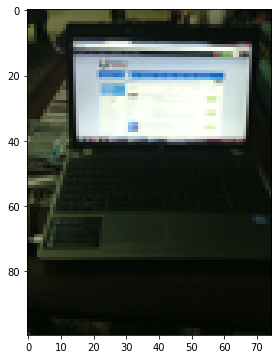

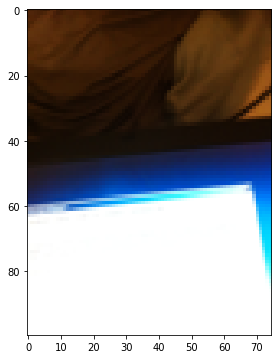

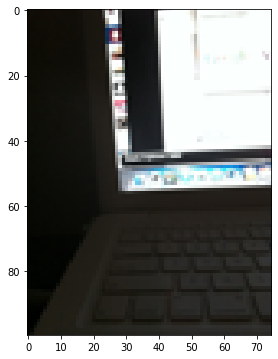

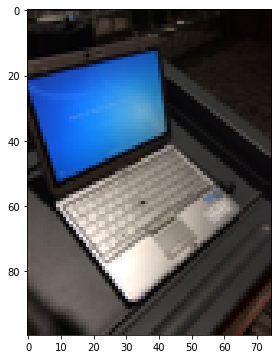

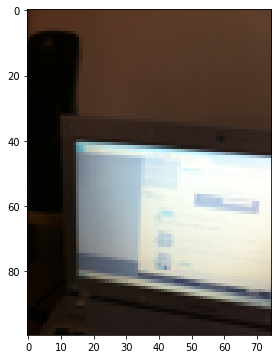

In [ ]:
txt_img_query('a laptop with a blue screen', 10)
# 6/9

Image Missing


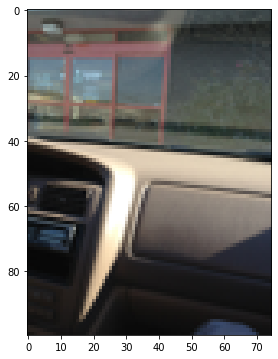

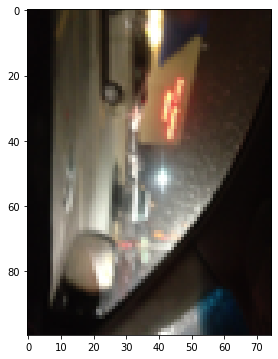

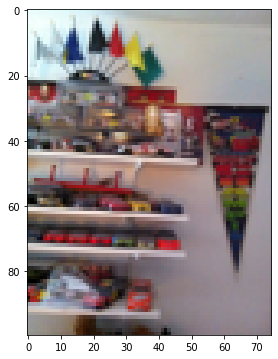

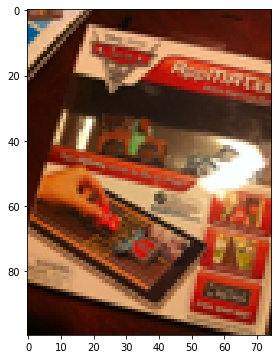

Image Missing


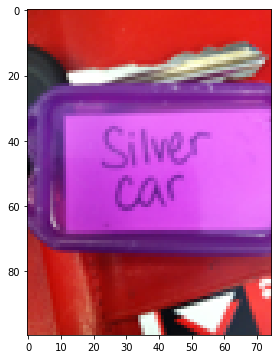

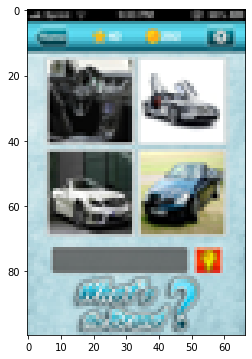

Image Missing


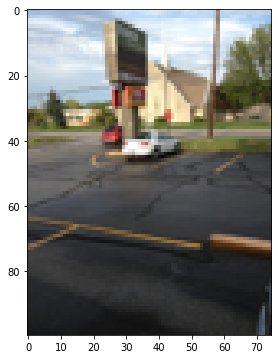

In [ ]:
txt_img_query('CAR oN      tHe roAD', 10)
# 2/6

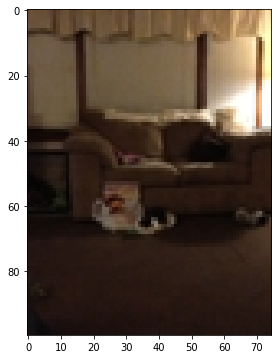

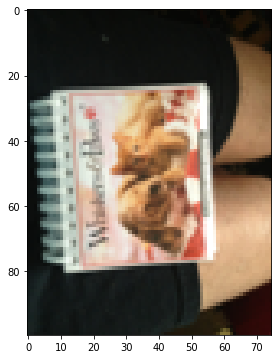

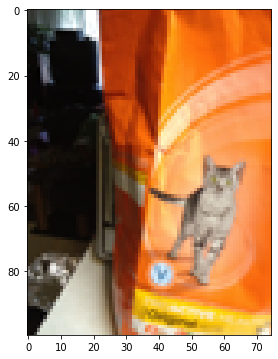

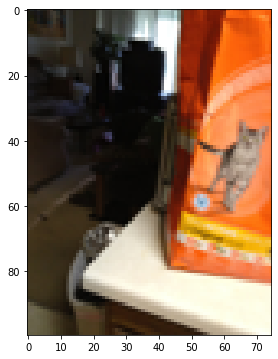

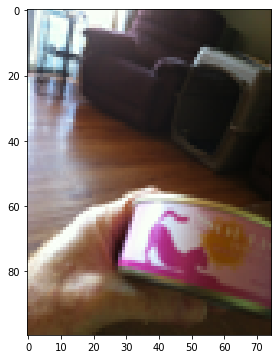

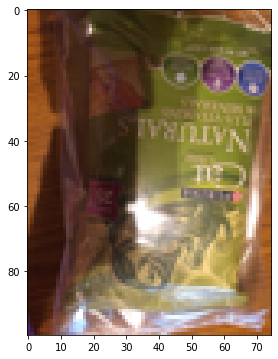

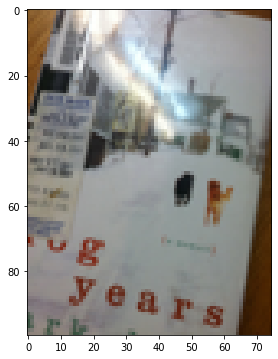

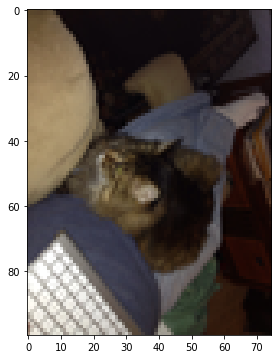

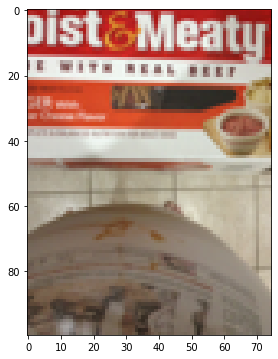

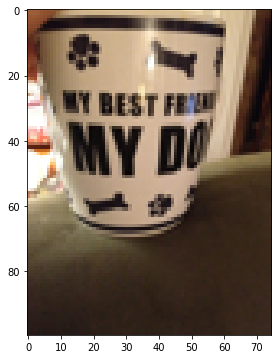

In [ ]:
txt_img_query('a cAt AnD A doG', 10)
# 4/10

In [ ]:
# ( 8/10 + 6/10 + 6/9 + 2/6 + 4/10 ) / 5 = 0.56